In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

### Question 1 - Import the data set below and do a full regression analysis.

- Plot the data and choose a regression model
- Separate your data into training and validation data using train_test_split
- Train your model using the training data
- Plot your model prediction on BOTH the training and validation data
- Report mean squared error for BOTH the training and validata data
- Plot a learning curve (you can use the code from the lecture)

#### THEN

- Reassess your model selection. You should try a few different polynomials and even linear regression before you are convinced you have a "good enough" model. This experimentation should be reflected in Question 2 where you discuss your approach and things you tried.

In [2]:
# Data for question 1
df_regdata = pd.read_csv(
    filepath_or_buffer='http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/Poly_data.csv',  
    sep=',')
df_regdata.head()


,X data,y data
0,-1.397830,4.622079
1,2.271780,4.009634
2,1.784556,2.406014
3,0.950711,1.375759
4,2.103490,4.154755


Text(0, 0.5, 'y data')

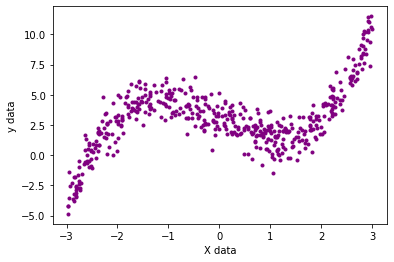

In [3]:
# Scatter plot to see what the data looks like

X = df_regdata[['X data']]
y = df_regdata[['y data']]

plt.figure()
plt.scatter(X, y, color = 'purple', marker = '.')
plt.xlabel('X data')
plt.ylabel('y data')

The plot of y data versus x data looks curvilinear, possibly on order of $x^3$, so it would be smart to do polynomial regression.

In [4]:
#split the data between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train.shape

(375, 1)

In [5]:
X.shape

(500, 1)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

poly_features = PolynomialFeatures(degree = 7, include_bias=False)

# create an array with the new polynomial features (stores X and X^2 and cross terms if needed)
X_poly_two = poly_features.fit_transform(X_train)

# Here we do a linear fit of our polynomial features after we normalize
scale = StandardScaler()
X_poly_two_norm = scale.fit_transform(X_poly_two)

lin_reg.fit(X_poly_two_norm, y_train)
lin_reg.intercept_, lin_reg.coef_

(array([3.02356575]),
 array([[-3.48270215, -0.28348538,  4.07141239,  1.02192167,  2.40696156,
         -0.67239772, -1.36971489]]))

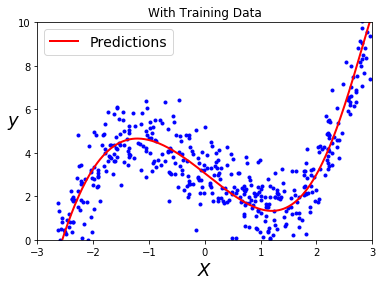

<function matplotlib.pyplot.show(*args, **kw)>

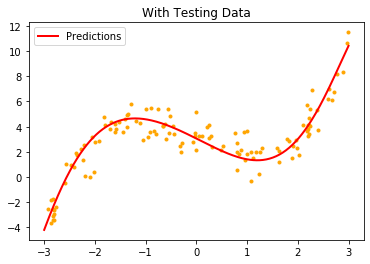

In [7]:
# creating regression curve
X_new=np.linspace(-3, 3, len(X_train)).reshape(len(X_train), 1)


X_new_poly = poly_features.transform(X_new)
X_new_poly_norm = scale.transform(X_new_poly) #scale the data

y_new_poly = lin_reg.predict(X_new_poly_norm)


# create plot of the model over the training data
plt.plot(X, y, "b.")
plt.title("With Training Data")
plt.plot(X_new, y_new_poly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# apply model to the testing data
plt.figure()
plt.title("With Testing Data")
plt.scatter(X_test, y_test, marker = ".", color = "orange")
plt.plot(X_new, y_new_poly, "r-", linewidth=2, label="Predictions")
plt.legend()
plt.show

In [8]:
# See how our model predicted on the training data
## look at mean squared error
y_train_poly = lin_reg.predict(X_poly_two_norm)
mean_squared_error(y_train,y_train_poly)

1.002954753579684

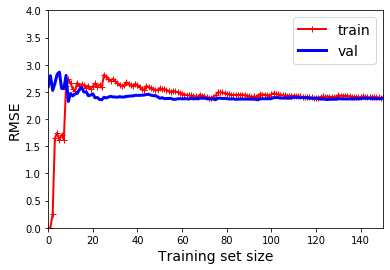

In [9]:
# check model with a learning curve 

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        # Fit the model to the first m elements of the training set
        model.fit(X_train[:m], y_train[:m])
        # Predict from the first m elements of the training set
        y_train_predict = model.predict(X_train[:m])
        # Predict from the validation set
        y_val_predict = model.predict(X_val)
        # Calculate the training error
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        # Calculate the validation error
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    # Plot the resulting curves
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)  
    
lin_reg = LinearRegression()
X_new=np.linspace(-3, 3, len(X_train)).reshape(len(X_train), 1)
plot_learning_curves(lin_reg, X_train, y_train)
plt.axis([0, 150, 0, 4])                        
plt.show()     

In [10]:
# See how our model predicted on the testing data
X_new=np.linspace(-3, 3, len(X_test)).reshape(len(X_test), 1)
y_new = lin_reg.predict(X_new)

mean_squared_error(y_test,y_new)

7.589902399244528

### Question 2 - Discuss your model from question 1. 

- What were your models strengths and weaknesses? 
- What choices and assumptions did you need to make along the way and why were they good choices?
- What things did you try before chosing your final "good" model?

The model did well for the training data which makes sense because the regression in formed on that data. I assumed that the data was best fit with a polynomial regression since the data looked curvilinear.  Initially I tried a degree of 1 which produced a terrible mean swuared error which was expected.  Since the data looked like a degree three polynomial I changed the order to 3 which drastically improved the mean-squared error.  However, I also tried a degree 5  and 7 polynomial which gave virtually the same output as the degree 3, but slightly worse when checking the testing data.  Because of this I left my model using a 3rd order polynomial.

### Question 3 - Import the data set below and do a full classification analysis

- Plot the data and choose a model for your decission boundary
- Separate your data into training and validation data using train_test_split
- Train your model using the training data
- Plot your model prediction on BOTH the training and validation data
- Report how your model did for BOTH the training and validataion data.


NOTE: For the last part

You could report your True Positive (TPR) and False Positive (FPR) rates using: 

from sklearn.metrics import roc_curve

to generate the TPR and FPR.

- OR - 

you can calculate your percent correct by hand:

pred_y=model.predict(X)
score=pred_y==y
score.value_counts()

#### THEN

- Reassess your model selection. You should try a few different polynomials and even linear decission boundaries before you are convinced you have a "good enough" model. This experimentation should be reflected in Question 4 where you discuss your approach and things you tried.

In [11]:
# Data for question 3
from sklearn.preprocessing import PolynomialFeatures

# import data
df_logdata = pd.read_csv(
    filepath_or_buffer='http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/Moons_Log_data.csv',  
    sep=',')
df_logdata.head()

# seperate into X and y
X = df_logdata[['X1 data','X2 data']].to_numpy()
y = df_logdata['y data']

# train model
pd.get_dummies(df_logdata,columns=['y data'])
y = pd.get_dummies(df_logdata,columns=['y data'])['y data_Cat']

# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y)

[0.08203509]
[[ 1.00305423 -2.55040141]]


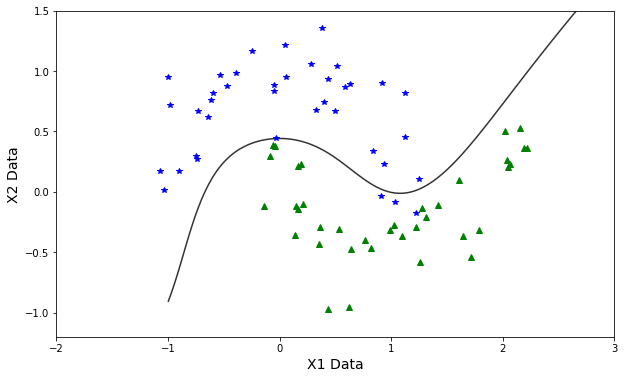

<Figure size 432x288 with 0 Axes>

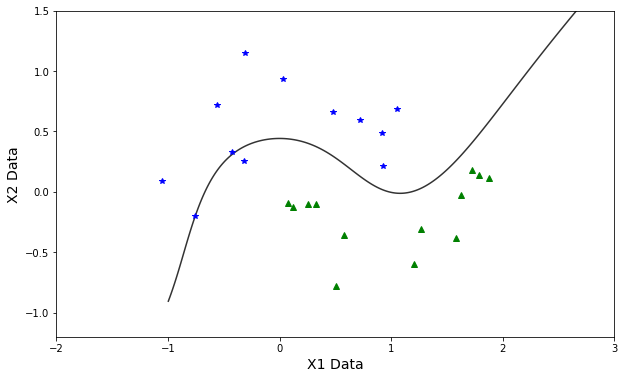

True     24
False     1
Name: y data_Cat, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train,y_train)
print(log_reg.intercept_)
print(log_reg.coef_)


polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("log_reg", LogisticRegression(solver='lbfgs')),
    ])

polynomial_regression.fit(X_train,y_train)

plt.figure(figsize=(10, 6))
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "b*")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "g^")

xx, yy = np.mgrid[-1:5:.01, -1:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = polynomial_regression.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

plt.xlabel("X1 Data", fontsize=14)
plt.ylabel("X2 Data", fontsize=14)
plt.axis([-2, 3, -1.2, 1.5])
plt.show()

# plot with test data
plt.figure()
plt.figure(figsize=(10, 6))
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "b*")
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "g^")
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
plt.xlabel("X1 Data", fontsize=14)
plt.ylabel("X2 Data", fontsize=14)
plt.axis([-2, 3, -1.2, 1.5])
plt.show()

# How well did it go?
y_pred=polynomial_regression.predict(X_test)
score=(y_pred==y_test)
score.value_counts()

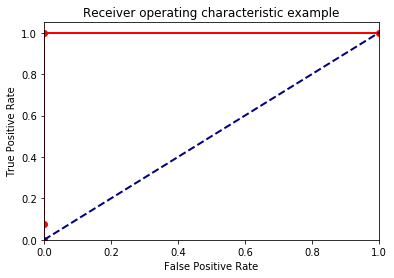

In [13]:
# This function will plot ROC curves for a simple two class system
from sklearn.metrics import roc_curve

# import data
df_logdata = pd.read_csv(
    filepath_or_buffer='http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/Moons_Log_data.csv',  
    sep=',')
df_logdata.head()

# seperate into X and y
X=df_logdata[['X1 data','X2 data']].to_numpy()
y = df_logdata['y data']

# train model
pd.get_dummies(df_logdata,columns=['y data'])
y = pd.get_dummies(df_logdata,columns=['y data'])['y data_Cat']

# split into training and testing data

def plot_ROC_curves_full(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
        
    y_score = model.fit(X_train, y_train).decision_function(X_val)
        
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_val, y_score)

    
    # Plot the resulting curves
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, 'ro-', lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show() 
    
    
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("log_reg", LogisticRegression(solver='lbfgs')),
    ])

plot_ROC_curves_full(polynomial_regression, X, y)

### Question 4 - Discuss your model from question 3. 

- What were your models strengths and weaknesses? 
- What choices and assumptions did you need to make along the way and why were they good choices?
- What things did you try before chosing your final "good" model?

The model does fairly well with the training data (as expected) but it does just as good or even better with the testing data where it has a higher accuracy out of our 25 points.  I initially tried an odd degree polynomial (3,5, and 7), and found that 3 was decent and 7 was a little too drastic of a curve where it had seemed too fitted.  Any order higher than 7 seemed like that model memorized the traning data. The fifth order regression seemed like a good in between where it looked smooth enough where it did not "memorize" the data.

### Do you have an overall questions or ideas from linear, logistic, or polynomial regression that you would like us to revisit in class?

- Explanation of roc curve and what it reprsents, and the reasoning for using a degree = 2 (seen in class example)
- The point of doing a linear fit of our polynomial features after we normalize

